# Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Valenbisi

In [3]:
valenbisi = pd.read_csv("../data/VALENBISI.csv")
valenbisi

,Direction,Number,Active,Free_bici,Free_stand,Total_stands,Ticket,Update_date,Latitude,Longitude,Folder_datetime
0,"Colón, 60",16,1,1,19,20,1,2024-01-19 00:09:53,39.470092,-0.370433,2024-01-19 00:15:01
1,Plaza de Tetuán,9,1,0,25,25,1,2024-01-19 00:09:53,39.474355,-0.369930,2024-01-19 00:15:01
2,Micer Mascó - Rodriguez Fornos,81,1,5,15,20,0,2024-01-19 00:09:53,39.475128,-0.360978,2024-01-19 00:15:01
3,General Elio - Llano del Real,83,1,0,25,25,1,2024-01-19 00:09:53,39.477585,-0.366970,2024-01-19 00:15:01
4,Blasco Ibañez - Mestre Ripoll,100,1,18,2,20,0,2024-01-19 00:09:53,39.471634,-0.338150,2024-01-19 00:15:01
...,...,...,...,...,...,...,...,...,...,...,...
11545222,Alcasser - Poeta Alberto Lista,265,1,5,10,15,0,2025-04-14 23:49:17,39.470973,-0.408117,2025-04-15 00:00:06
11545223,Ninot - Regino Mas,270,1,0,16,16,0,2025-04-14 23:49:17,39.500075,-0.392889,2025-04-15 00:00:06
11545224,San Francisco de Paula - Castell de Pop,274,1,13,2,15,0,2025-04-14 23:49:17,39.448070,-0.333188,2025-04-15 00:00:06
11545225,Valle de la Ballestera - Pio Baroja,244,1,9,11,20,0,2025-04-14 23:49:17,39.478506,-0.406136,2025-04-15 00:00:06


In [ ]:
def cut_date(df, startdatetime, enddatetime):
    # enddate in this string format: '2024-01-01 12:00:00'
    mask = (df['Update_date'] >= startdatetime) & (df['Update_date'] <= enddatetime)
    return df.loc[mask]

def get_count_map(df, target):

    # Create folium map centered around Valencia
    traffic_map = folium.Map(location=[39.4701, -0.3704], zoom_start=14)

    for _, row in df.iterrows():
        location = (row['Latitude'], row['Longitude'])
        
        # Circle
        folium.CircleMarker(
            location=location,
            radius=6,
            color='white',
            fill=True,
            fill_opacity=0.9
        ).add_to(traffic_map)
        
        # Number label
        label = folium.map.Marker(
            location=location,
            icon=folium.DivIcon(
                icon_size=(150,36),
                icon_anchor=(7, 7),
                html=f'<div style="font-size:10pt; color:black;"><b>  {row[target]}</b></div>'
            )
        )
        traffic_map.add_child(label)

    return traffic_map

def get_active_map(df):
    # Define color map
    colors = {
        0: "Red",        
        1: "Green",       
    }

    # Create folium map centered around Valencia
    traffic_map = folium.Map(location=[39.4701, -0.3704], zoom_start=14)

    # Add points
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=6,
            color=colors.get(row['Active'], "white"),
            fill=True,
            fill_opacity=0.9,
            popup=f"Active: {row['Active']}"
        ).add_to(traffic_map)
    return traffic_map
    

In [6]:
# Show active stations

jan1 = '2024-01-01'
clock12 = ' 12:00:00'
clock1214 = ' 12:14:00'

valen_one = cut_date(valenbisi, jan1 + clock12, jan1 + clock1214)

active_map = get_active_map(valen_one)
count_map = get_count_map(valen_one, 'Free_bici')

In [38]:
active_map

In [ ]:
count_map

## Colón, 60
Lets look at one station, and if there is any correlation to day or season 

In [40]:
valenbisi_colon = valenbisi[(valenbisi['Number']==16) & (valenbisi['Active']==1) ]

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/1700193448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valenbisi_colon['Hour'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.hour
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/1700193448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valenbisi_colon, x='Hour', y='Free_bici', estimator='mean', palette='viridis')


<Axes: xlabel='Hour', ylabel='Free_bici'>

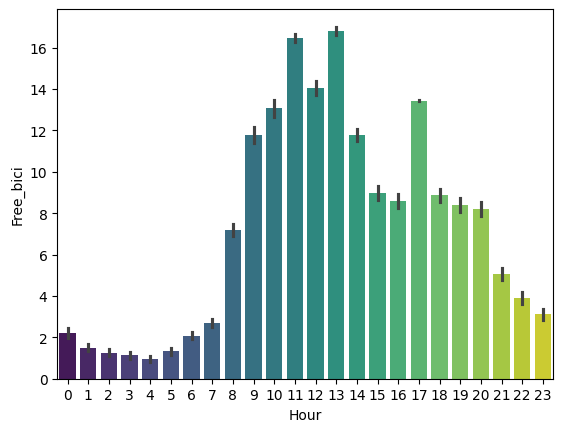

In [41]:
# Free bici basde on hour
valenbisi_colon['Hour'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.hour
sns.barplot(data=valenbisi_colon, x='Hour', y='Free_bici', estimator='mean', palette='viridis')


/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/1941238436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valenbisi_colon['Weekday'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.day_name()
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/1941238436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valenbisi_colon, x='Weekday', y='Free_bici', order=weekday_order, estimator='mean', palette='crest')


<Axes: xlabel='Weekday', ylabel='Free_bici'>

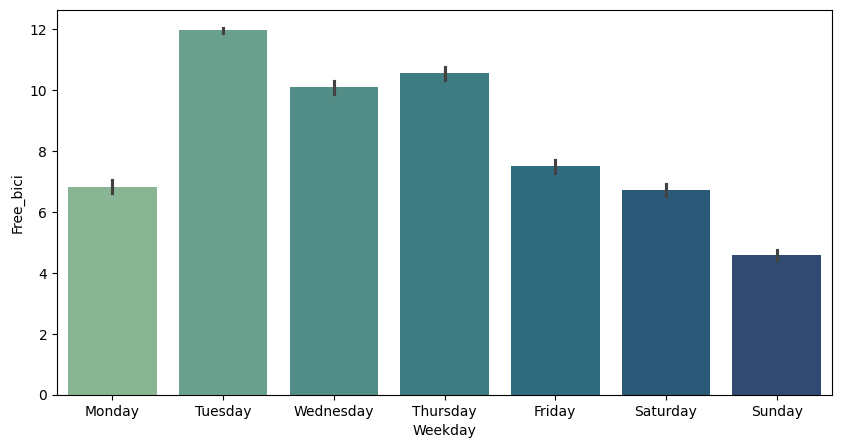

In [ ]:

valenbisi_colon['Weekday'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.barplot(data=valenbisi_colon, x='Weekday', y='Free_bici', order=weekday_order, estimator='mean', palette='crest')


/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/1656947252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valenbisi_colon['Month'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.month_name()


<Axes: xlabel='Month', ylabel='Free_bici'>

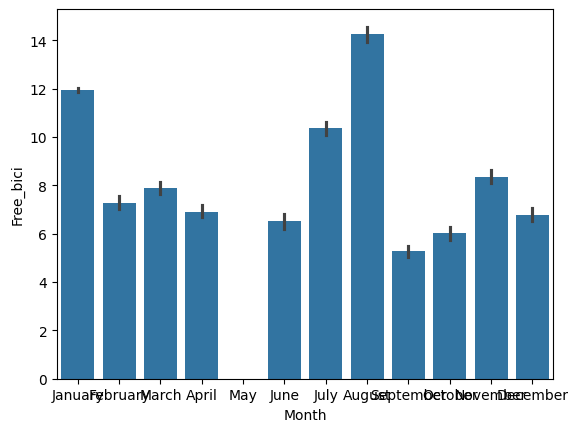

In [43]:
# Free bici based on month
valenbisi_colon['Month'] = pd.to_datetime(valenbisi_colon['Update_date']).dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sns.barplot(data=valenbisi_colon, x='Month', y='Free_bici', order=month_order, estimator='mean')


## other stations

In [44]:
valenbisi_b = valenbisi[(valenbisi['Number']==81) & (valenbisi['Active']==1) ]
valenbisi_b

,Direction,Number,Active,Free_bici,Free_stand,Total_stands,Ticket,Update_date,Latitude,Longitude,Folder_datetime
2,Micer Mascó - Rodriguez Fornos,81,1,5,15,20,0,2024-01-19 00:09:53,39.475128,-0.360978,2024-01-19 00:15:01
360,Micer Mascó - Rodriguez Fornos,81,1,3,17,20,0,2024-01-19 00:20:08,39.475128,-0.360978,2024-01-19 00:30:02
647,Micer Mascó - Rodriguez Fornos,81,1,4,16,20,0,2024-01-19 00:40:00,39.475128,-0.360978,2024-01-19 00:45:02
827,Micer Mascó - Rodriguez Fornos,81,1,4,16,20,0,2024-01-19 00:49:13,39.475128,-0.360978,2024-01-19 01:00:05
1290,Micer Mascó - Rodriguez Fornos,81,1,5,15,20,0,2024-01-19 01:09:38,39.475128,-0.360978,2024-01-19 01:15:09
...,...,...,...,...,...,...,...,...,...,...,...
11543954,Micer Mascó - Rodriguez Fornos,81,1,7,13,20,0,2025-04-14 22:49:42,39.475128,-0.360978,2025-04-14 23:00:01
11544147,Micer Mascó - Rodriguez Fornos,81,1,7,13,20,0,2025-04-14 23:09:53,39.475128,-0.360978,2025-04-14 23:15:02
11544514,Micer Mascó - Rodriguez Fornos,81,1,7,13,20,0,2025-04-14 23:19:59,39.475128,-0.360978,2025-04-14 23:30:02
11544694,Micer Mascó - Rodriguez Fornos,81,1,8,12,20,0,2025-04-14 23:40:12,39.475128,-0.360978,2025-04-14 23:45:02


In [47]:
def plot_station_counts(station_nr):
    df = valenbisi[(valenbisi['Number']==station_nr) & (valenbisi['Active']==1) ]
    # Free bici basde on hour
    df['Hour'] = pd.to_datetime(df['Update_date']).dt.hour
    sns.barplot(data=df, x='Hour', y='Free_bici', estimator='mean', palette='viridis')
    plt.show()
    
    # weekday
    df['Weekday'] = pd.to_datetime(df['Update_date']).dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.barplot(data=df, x='Weekday', y='Free_bici', order=weekday_order, estimator='mean', palette='crest')
    plt.show()

    # Free bici based on month
    df['Month'] = pd.to_datetime(df['Update_date']).dt.month_name()
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    sns.barplot(data=df, x='Month', y='Free_bici', order=month_order, estimator='mean')
    plt.show()

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['Update_date']).dt.hour
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Hour', y='Free_bici', estimator='mean', palette='viridis')


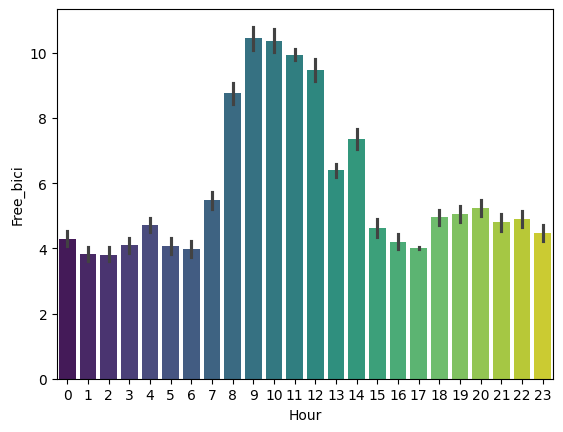

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = pd.to_datetime(df['Update_date']).dt.day_name()
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weekday', y='Free_bici', order=weekday_order, estimator='mean', palette='crest')


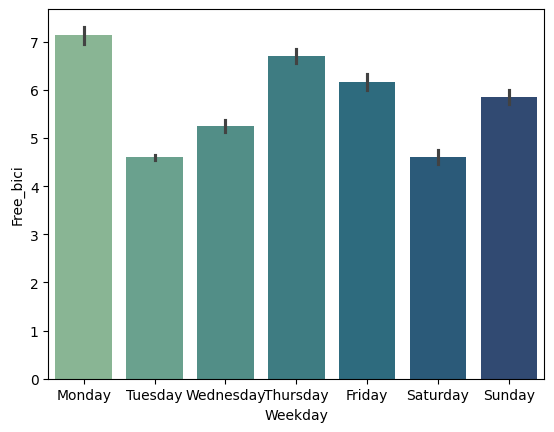

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Update_date']).dt.month_name()


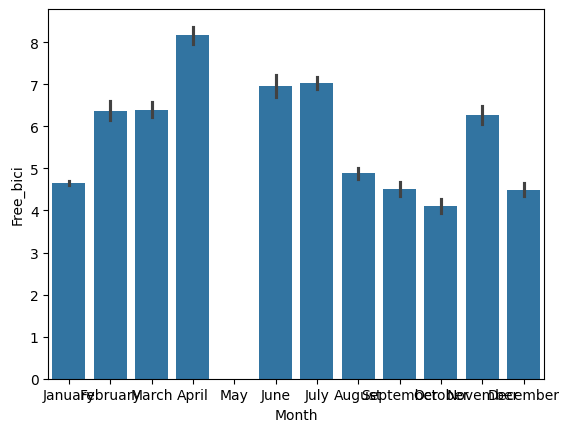

In [48]:
plot_station_counts(81)

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['Update_date']).dt.hour
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Hour', y='Free_bici', estimator='mean', palette='viridis')


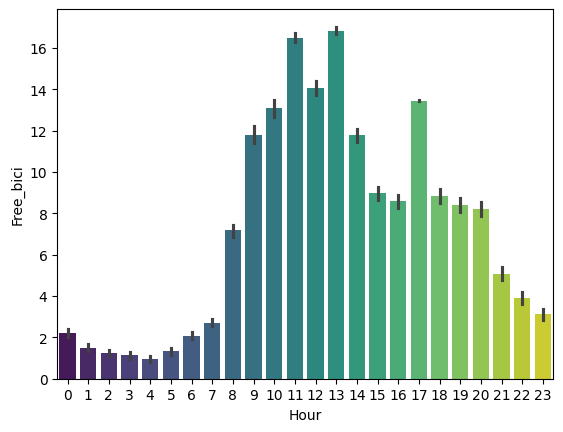

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = pd.to_datetime(df['Update_date']).dt.day_name()
/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weekday', y='Free_bici', order=weekday_order, estimator='mean', palette='crest')


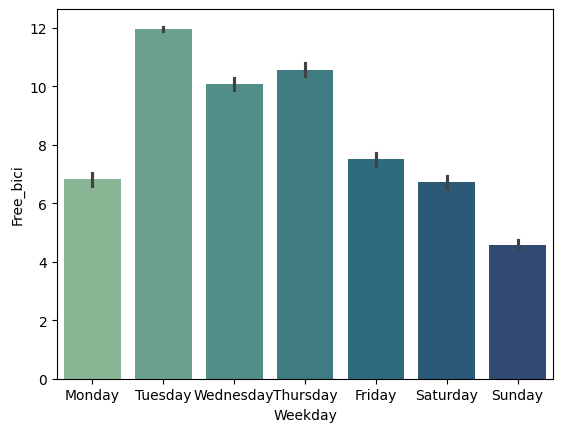

/var/folders/vs/5hqqq9px6_z7w4dnv2j4238m0000gn/T/ipykernel_14032/68817239.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Update_date']).dt.month_name()


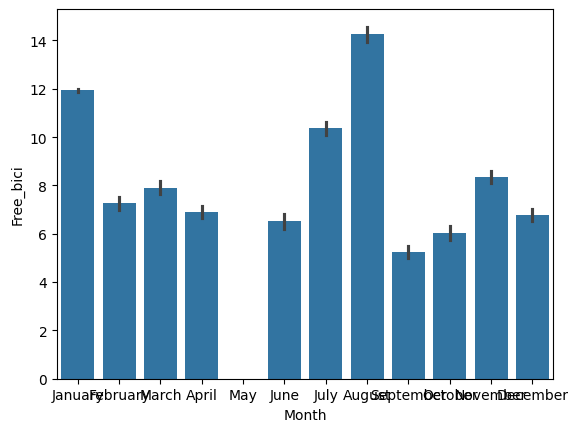

In [49]:
plot_station_counts(16)